# Upload data 

## Upload data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('kc_house_data_cleaned.csv')

In [3]:
data.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,0,98178,25363,262,10.3,0
1,1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,0,98178,25363,262,10.3,0
2,2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,0,98178,25363,262,10.3,0
3,3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,0,98178,25363,262,10.3,0
4,4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,0,98178,25363,262,10.3,0


In [4]:
data.sqft_living.mean()

2079.0367265653945

In [5]:
data.sqft_living.std()

910.9015530676392

In [6]:
data.shape

(21592, 17)

In [7]:
data.dtypes

Unnamed: 0            int64
price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront            int64
grade                 int64
sqft_basement       float64
yr_built              int64
yr_renovated          int64
zipcode               int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
recent_renov          int64
dtype: object

## Rename column and delete extra column

In [8]:
data.rename(columns={'hot_market_score': 'active_mkt_score'}, inplace=True)

In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,active_mkt_score,recent_renov
0,221900.0,3,1.0,1180,5650,1.0,0,7,0.0,1955,0,98178,25363,262,10.3,0


# Make initial model of data

In [11]:
from statsmodels.formula.api import ols

In [12]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement',
               'yr_built', 'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'recent_renov']

In [13]:
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3054.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:32   Log-Likelihood:            -2.9579e+05
No. Observations:               21592   AIC:                         5.916e+05
Df Residuals:                   21578   BIC:                         5.917e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.814e+06   1.25e+05     54.556      0.000    6.57e+06    7.06e+06
bedrooms         -4.162e+04   2119.941    -19.630      0.000   -4.58e+04   -3.75e+04
bathrooms         4.673e+04   3482.312     13.420      0.000    3.99e+04    5.36e+04
sqft_living        168.5632      3.557     47.391      0.000     161.591     175.535
sqft_lot            -0.2978      0.038     -7.765      0.000      -0.373      -0.223
floors            2.209e+04   3697.104      5.976      0.000    1.48e+04    2.93e+04
waterfront        7.412e+05   1.82e+04     40.812      0.000    7.06e+05    7.77e+05
grade             1.315e+05   2159.190     60.918      0.000    1.27e+05    1.36e+05
sqft_basement       19.1676      4.372      4.384      0.000      10.598      27.737
yr_built         -3821.3997     66.178    -57.744      0.000   -3951.114   -3691.686
zipcode_pop         -4.1765      0.488     -8.551      0.000      -5.134      -3.219
listings_in_zip    253.1980     39.902      6.345      0.000     174.986     331.410
active_mkt_score -4828.4710   1203.155     -4.013      0.000   -7186.744   -2470.198
recent_renov      4.487e+04   9837.028      4.562      0.000    2.56e+04    6.42e+04
==============================================================================
Omnibus:                    15031.811   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           764598.069
Skew:                           2.773   Prob(JB):                         0.00
Kurtosis:                      31.620   Cond. No.                     3.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Many values are good, but there's high multicollinearity 

### Check variable distributions

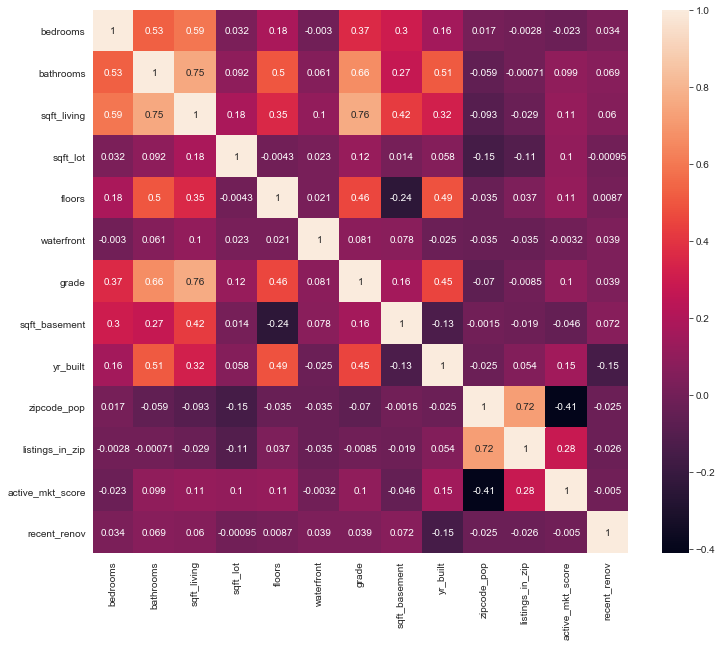

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(data[chosen_cols].corr(), annot=True);

Actually not too much multicollinearity.

# Refine model for inference

My goal is for the real estate company to understand how various features play into the price of houses. This info will be useful when showing homes to prospective buyers and negotiating with sellers.

## Experiment with different features

### Bedrooms and Bathrooms 

In [15]:
characteristics = ['bedrooms', 'bathrooms']

In [16]:
outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     4100.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:33   Log-Likelihood:            -3.0358e+05
No. Observations:               21592   AIC:                         6.072e+05
Df Residuals:                   21589   BIC:                         6.072e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.958e+04   8355.343     -3.541      0.000    -4.6e+04   -1.32e+04
bedrooms    2.231e+04   2738.289      8.149      0.000    1.69e+04    2.77e+04
bathrooms   2.336e+05   3228.956     72.337      0.000    2.27e+05     2.4e+05
==============================================================================
Omnibus:                    16475.423   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           687633.598
Skew:                           3.282   Prob(JB):                         0.00
Kurtosis:                      29.856   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks OK

### Square foot characteristics 

In [17]:
characteristics = ['sqft_living', 'sqft_lot', 'sqft_basement']

In [18]:
outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     6924.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:33   Log-Likelihood:            -2.9978e+05
No. Observations:               21592   AIC:                         5.996e+05
Df Residuals:                   21588   BIC:                         5.996e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.765e+04   4435.855     -8.487      0.000   -4.63e+04    -2.9e+04
sqft_living     277.6637      2.175    127.682      0.000     273.401     281.926
sqft_lot         -0.3018      0.045     -6.694      0.000      -0.390      -0.213
sqft_basement    16.0825      4.456      3.610      0.000       7.349      24.816
==============================================================================
Omnibus:                    14084.870   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427796.288
Skew:                           2.680   Prob(JB):                         0.00
Kurtosis:                      24.137   Cond. No.                     1.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### sqft_living

In [19]:
characteristics = ['sqft_living']

In [20]:
outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 2.065e+04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:33   Log-Likelihood:            -2.9981e+05
No. Observations:               21592   AIC:                         5.996e+05
Df Residuals:                   21590   BIC:                         5.996e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.945e+04   4399.510     -8.967      0.000   -4.81e+04   -3.08e+04
sqft_living   278.5582      1.938    143.716      0.000     274.759     282.357
==============================================================================
Omnibus:                    14171.423   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           433967.175
Skew:                           2.702   Prob(JB):                         0.00
Kurtosis:                      24.287   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

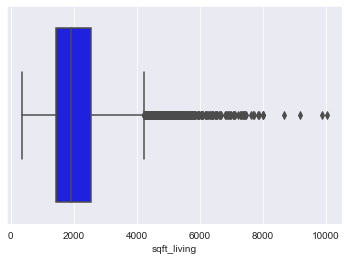

In [21]:
sns.boxplot(x=data['sqft_living'], color='b')

A lot of outliers

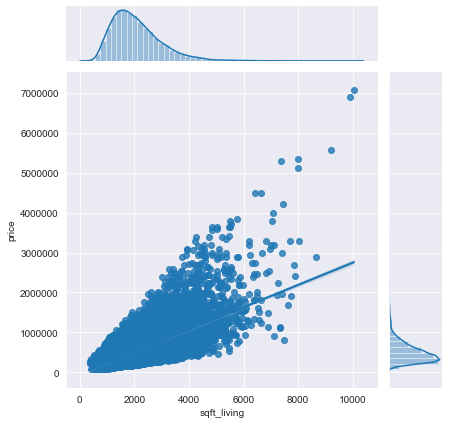

In [22]:
sns.jointplot(x = data['sqft_living'], y = data.price, kind='reg')

Remove high outliers

In [23]:
data2 = data[data.sqft_living < 8000]

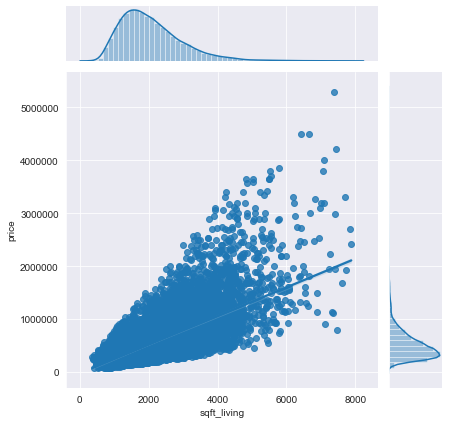

In [24]:
sns.jointplot(x = data2['sqft_living'], y = data2.price, kind='reg')

In [25]:
characteristics = ['sqft_living']

In [26]:
outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                 2.009e+04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:36   Log-Likelihood:            -2.9921e+05
No. Observations:               21585   AIC:                         5.984e+05
Df Residuals:                   21583   BIC:                         5.984e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.445e+04   4328.099     -5.650      0.000   -3.29e+04    -1.6e+04
sqft_living   270.9076      1.911    141.745      0.000     267.161     274.654
==============================================================================
Omnibus:                    12062.611   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200427.259
Skew:                           2.337   Prob(JB):                         0.00
Kurtosis:                      17.178   Cond. No.                     5.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Still large condition number, even without those outliers.

#### sqft_lot 

In [27]:
characteristics = ['sqft_lot']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           1.09e-41
Time:                        16:02:36   Log-Likelihood:            -3.0696e+05
No. Observations:               21592   AIC:                         6.139e+05
Df Residuals:                   21590   BIC:                         6.139e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.271e+05   2627.914    200.586      0.000    5.22e+05    5.32e+05
sqft_lot       0.8367      0.062     13.556      0.000       0.716       0.958
==============================================================================
Omnibus:                    17993.101   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           798749.489
Skew:                           3.757   Prob(JB):                         0.00
Kurtosis:                      31.834   Cond. No.                     4.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again, I get the warning.

#### sqft_basement

In [28]:
characteristics = ['sqft_basement']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2342.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:36   Log-Likelihood:            -3.0594e+05
No. Observations:               21592   AIC:                         6.119e+05
Df Residuals:                   21590   BIC:                         6.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.657e+05   2800.111    166.307      0.000     4.6e+05    4.71e+05
sqft_basement   259.4956      5.362     48.394      0.000     248.985     270.006
==============================================================================
Omnibus:                    17136.670   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           680246.571
Skew:                           3.515   Prob(JB):                         0.00
Kurtosis:                      29.584   Cond. No.                         623.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No warning for this one 

### floors

In [29]:
characteristics = ['floors']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1543.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:36   Log-Likelihood:            -3.0631e+05
No. Observations:               21592   AIC:                         6.126e+05
Df Residuals:                   21590   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.802e+05   7023.994     39.886      0.000    2.66e+05    2.94e+05
floors      1.737e+05   4421.800     39.283      0.000    1.65e+05    1.82e+05
==============================================================================
Omnibus:                    18196.551   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           876845.799
Skew:                           3.793   Prob(JB):                         0.00
Kurtosis:                      33.284   Cond. No.                         6.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Very low $R^2$. Good p-values and no condition number warning.

### waterfront

In [30]:
characteristics = ['waterfront']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1594.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:36   Log-Likelihood:            -3.0629e+05
No. Observations:               21592   AIC:                         6.126e+05
Df Residuals:                   21590   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.319e+05   2391.259    222.417      0.000    5.27e+05    5.37e+05
waterfront  1.165e+06   2.92e+04     39.924      0.000    1.11e+06    1.22e+06
==============================================================================
Omnibus:                    16358.780   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           570657.378
Skew:                           3.315   Prob(JB):                         0.00
Kurtosis:                      27.297   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Very low $R^2$. Good p-values and no condition number warning.

### grade

In [31]:
characteristics = ['grade']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                 1.760e+04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:36   Log-Likelihood:            -3.0062e+05
No. Observations:               21592   AIC:                         6.012e+05
Df Residuals:                   21590   BIC:                         6.013e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.049e+06   1.21e+04    -86.604      0.000   -1.07e+06   -1.03e+06
grade       2.075e+05   1564.054    132.674      0.000    2.04e+05    2.11e+05
==============================================================================
Omnibus:                    18389.318   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1326708.171
Skew:                           3.700   Prob(JB):                         0.00
Kurtosis:                      40.682   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks OK. **The condition number problems are in `sqft_lot` and `sqft_living`.**

### Market characteristics

#### yr_built

In [32]:
characteristics = ['yr_built']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     68.30
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           1.49e-16
Time:                        16:02:36   Log-Likelihood:            -3.0702e+05
No. Observations:               21592   AIC:                         6.140e+05
Df Residuals:                   21590   BIC:                         6.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.277e+05   1.65e+05     -5.002      0.000   -1.15e+06   -5.03e+05
yr_built     693.7659     83.949      8.264      0.000     529.220     858.312
==============================================================================
Omnibus:                    17968.463   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           788089.584
Skew:                           3.753   Prob(JB):                         0.00
Kurtosis:                      31.629   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Low $R^2$. Gets the other warning

#### zipcode_pop

In [33]:
characteristics = ['zipcode_pop']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           1.75e-68
Time:                        16:02:36   Log-Likelihood:            -3.0690e+05
No. Observations:               21592   AIC:                         6.138e+05
Df Residuals:                   21590   BIC:                         6.138e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.593e+05   7240.924     91.046      0.000    6.45e+05    6.73e+05
zipcode_pop    -3.6849      0.210    -17.551      0.000      -4.096      -3.273
==============================================================================
Omnibus:                    17875.753   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           779945.767
Skew:                           3.724   Prob(JB):                         0.00
Kurtosis:                      31.486   Cond. No.                     1.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Low  $R^2$. Gets the other warning

#### listings_in_zip

In [34]:
characteristics = ['listings_in_zip']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     53.04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           3.39e-13
Time:                        16:02:36   Log-Likelihood:            -3.0703e+05
No. Observations:               21592   AIC:                         6.141e+05
Df Residuals:                   21590   BIC:                         6.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.89e+05   7202.483     81.772      0.000    5.75e+05    6.03e+05
listings_in_zip  -132.0632     18.134     -7.283      0.000    -167.607     -96.519
==============================================================================
Omnibus:                    17817.511   Durbin-Watson:                   1.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           770056.887
Skew:                           3.708   Prob(JB):                         0.00
Kurtosis:                      31.301   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Low  $R^2$. Gets the other conition number warning.

#### active market score

In [35]:
characteristics = ['active_mkt_score']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     176.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           4.38e-40
Time:                        16:02:36   Log-Likelihood:            -3.0697e+05
No. Observations:               21592   AIC:                         6.139e+05
Df Residuals:                   21590   BIC:                         6.140e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.265e+05   8869.945     48.085      0.000    4.09e+05    4.44e+05
active_mkt_score  9419.5414    709.337     13.279      0.000    8029.188    1.08e+04
==============================================================================
Omnibus:                    18191.197   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           817719.562
Skew:                           3.819   Prob(JB):                         0.00
Kurtosis:                      32.164   Cond. No.                         45.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Low  $R^2$. No warning.

#### recent renov

In [36]:
characteristics = ['recent_renov']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     319.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           5.26e-71
Time:                        16:02:36   Log-Likelihood:            -3.0690e+05
No. Observations:               21592   AIC:                         6.138e+05
Df Residuals:                   21590   BIC:                         6.138e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.328e+05   2481.657    214.690      0.000    5.28e+05    5.38e+05
recent_renov  2.857e+05    1.6e+04     17.882      0.000    2.54e+05    3.17e+05
==============================================================================
Omnibus:                    17892.296   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           778835.465
Skew:                           3.730   Prob(JB):                         0.00
Kurtosis:                      31.461   Cond. No.                         6.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Low  $R^2$. No warning.

## Multicollinearity troubleshooting

### See what happens with characteristics that didn't get condition number warning

In [37]:
characteristics = ['bedrooms', 'bathrooms', 'sqft_basement', 'floors', 'waterfront', 'grade', 
                   'active_mkt_score', 'recent_renov']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3172.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:36   Log-Likelihood:            -2.9866e+05
No. Observations:               21592   AIC:                         5.973e+05
Df Residuals:                   21583   BIC:                         5.974e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -9.96e+05   1.35e+04    -73.783      0.000   -1.02e+06    -9.7e+05
bedrooms          7308.4409   2235.495      3.269      0.001    2926.705    1.17e+04
bathrooms         3.277e+04   3544.183      9.246      0.000    2.58e+04    3.97e+04
sqft_basement      145.5418      4.566     31.873      0.000     136.592     154.492
floors           -4940.4364   4132.163     -1.196      0.232    -1.3e+04    3158.908
waterfront        8.688e+05   2.07e+04     42.048      0.000    8.28e+05    9.09e+05
grade             1.765e+05   1960.201     90.051      0.000    1.73e+05     1.8e+05
active_mkt_score  3824.7783    488.975      7.822      0.000    2866.350    4783.206
recent_renov      1.737e+05    1.1e+04     15.843      0.000    1.52e+05    1.95e+05
==============================================================================
Omnibus:                    16267.548   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           897464.875
Skew:                           3.114   Prob(JB):                         0.00
Kurtosis:                      33.964   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Raised warning.

### Try VIF

In [38]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [39]:
characteristics = ['bedrooms', 'bathrooms', 'sqft_basement', 'floors', 'waterfront', 'grade', 
                   'active_mkt_score', 'recent_renov']
X = data.loc[:, characteristics]
X
calc_vif(X)

,variables,VIF
0,bedrooms,19.092380
1,bathrooms,19.388973
2,sqft_basement,2.027614
3,floors,15.312776
4,waterfront,1.021286
5,grade,38.935575
6,active_mkt_score,11.326385
7,recent_renov,1.033930


For those with a high VIF value, it means they can be predicted by other independent variables in the dataset.

Now let me try it with the all the chosen columns.

In [40]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 'yr_built',
              'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'recent_renov']
X = data.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,25.222366
1,bathrooms,25.016799
2,sqft_living,30.268718
3,sqft_lot,1.240747
4,floors,15.630725
5,waterfront,1.027909
6,grade,129.216182
7,sqft_basement,2.357154
8,yr_built,226.187036
9,zipcode_pop,132.012879


Some too-high scores. Looking to get under 5.0.

# Recalibrate data

## Set up yr_built as categorical

In [41]:
data.yr_built.describe()

count    21592.000000
mean      1971.004122
std         29.372465
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

I'll set up six categories:  
1. 1900-1919  
2. 1920-1939  
3. 1940-1959  
4. 1960-1979  
5. 1980-1999  
6. 2000-2015  

In [42]:
# test the filter
data[data.yr_built <= 1919].head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,active_mkt_score,recent_renov
18,825000.0,2,1.0,1150,12775,1.0,1,6,0.0,1908,0,98178,25363,262,10.3,0
37,400000.0,6,2.0,2350,6554,2.0,0,8,350.0,1905,0,98178,25363,262,10.3,0
40,210000.0,3,1.0,1200,7500,1.0,0,6,0.0,1905,1989,98178,25363,262,10.3,0
48,160000.0,2,1.0,1180,9350,1.0,0,6,0.0,1918,0,98178,25363,262,10.3,0
101,315000.0,4,2.0,1780,5336,1.5,0,6,0.0,1918,0,98178,25363,262,10.3,0


Create a new column

In [43]:
data.columns[9]

'yr_built'

In [44]:
data.insert(10, "grouped_yr_built", 0)

In [45]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,grouped_yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,active_mkt_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,0,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,0,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,0,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,0,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,0,0,98178,25363,262,10.3,0


In [46]:
# testing it out
for i, j in data[0:5].iterrows(): 
    if j.yr_built == 1955:
        print('yes')
        data.at[i, 'grouped_yr_built'] = 3
    else:
        print('no')
data.head(5)

yes
no
no
no
no


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,grouped_yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,active_mkt_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,3,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,0,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,0,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,0,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,0,0,98178,25363,262,10.3,0


I'll set up six categories:  
1. 1900-1919  
2. 1920-1939  
3. 1940-1959  
4. 1960-1979  
5. 1980-1999  
6. 2000-2015  

In [47]:
# assigning category number to grouped_yr_built
for i, j in data.iterrows(): 
    if j.yr_built <= 1919:
        data.at[i, 'grouped_yr_built'] = 1
    if j.yr_built >= 1920 and j.yr_built <=1939:
        data.at[i, 'grouped_yr_built'] = 2
    if j.yr_built >= 1940 and j.yr_built <=1959:
        data.at[i, 'grouped_yr_built'] = 3
    if j.yr_built >= 1960 and j.yr_built <=1979:
        data.at[i, 'grouped_yr_built'] = 4
    if j.yr_built >= 1980 and j.yr_built <=1999:
        data.at[i, 'grouped_yr_built'] = 5
    if j.yr_built >= 2000 and j.yr_built <=2015:
        data.at[i, 'grouped_yr_built'] = 6

In [48]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,grouped_yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,active_mkt_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,3,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,3,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,4,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,4,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,2,0,98178,25363,262,10.3,0


In [49]:
data.grouped_yr_built.describe()

count    21592.000000
mean         4.093646
std          1.482966
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: grouped_yr_built, dtype: float64

In [50]:
grouped_yr_built_dummies = pd.get_dummies(data['grouped_yr_built'], prefix='group_yr_built')

In [51]:
data = pd.concat([data, grouped_yr_built_dummies], axis=1)
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,...,zipcode_pop,listings_in_zip,active_mkt_score,recent_renov,group_yr_built_1,group_yr_built_2,group_yr_built_3,group_yr_built_4,group_yr_built_5,group_yr_built_6
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,...,25363,262,10.3,0,0,0,1,0,0,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,...,25363,262,10.3,0,0,0,1,0,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,...,25363,262,10.3,0,0,0,0,1,0,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,...,25363,262,10.3,0,0,0,0,1,0,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,...,25363,262,10.3,0,0,1,0,0,0,0


In [52]:
data.drop(['grouped_yr_built'], axis=1, inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21592 entries, 0 to 21591
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21592 non-null  float64
 1   bedrooms          21592 non-null  int64  
 2   bathrooms         21592 non-null  float64
 3   sqft_living       21592 non-null  int64  
 4   sqft_lot          21592 non-null  int64  
 5   floors            21592 non-null  float64
 6   waterfront        21592 non-null  int64  
 7   grade             21592 non-null  int64  
 8   sqft_basement     21592 non-null  float64
 9   yr_built          21592 non-null  int64  
 10  yr_renovated      21592 non-null  int64  
 11  zipcode           21592 non-null  int64  
 12  zipcode_pop       21592 non-null  int64  
 13  listings_in_zip   21592 non-null  int64  
 14  active_mkt_score  21592 non-null  float64
 15  recent_renov      21592 non-null  int64  
 16  group_yr_built_1  21592 non-null  uint8 

## Check multicollinearity again

First, the former VIF

In [54]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 'yr_built',
              'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'recent_renov']
X = data.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,25.222366
1,bathrooms,25.016799
2,sqft_living,30.268718
3,sqft_lot,1.240747
4,floors,15.630725
5,waterfront,1.027909
6,grade,129.216182
7,sqft_basement,2.357154
8,yr_built,226.187036
9,zipcode_pop,132.012879


And now how it's changed.

In [55]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
              'group_yr_built_3','group_yr_built_4','group_yr_built_5','group_yr_built_6',]
X = data.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,1.770512
1,bathrooms,3.391302
2,sqft_living,4.896267
3,sqft_lot,1.098449
4,floors,2.334314
5,waterfront,1.025944
6,grade,2.993499
7,sqft_basement,1.724735
8,zipcode_pop,15.233215
9,listings_in_zip,13.757574


It brought down many numbers quite a bit!

## Run a model with yr_built as categorical

In [56]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement',
               'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6', ]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2356.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:42   Log-Likelihood:            -2.9572e+05
No. Observations:               21592   AIC:                         5.915e+05
Df Residuals:                   21574   BIC:                         5.916e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.764e+05   1.92e+04    -29.960      0.000   -6.14e+05   -5.39e+05
bedrooms         -3.923e+04   2152.648    -18.225      0.000   -4.35e+04    -3.5e+04
bathrooms          4.66e+04   3513.094     13.264      0.000    3.97e+04    5.35e+04
sqft_living        167.9028      3.551     47.282      0.000     160.942     174.863
sqft_lot            -0.2290      0.038     -5.955      0.000      -0.304      -0.154
floors            8059.8404   4139.345      1.947      0.052     -53.582    1.62e+04
waterfront        7.397e+05   1.81e+04     40.804      0.000    7.04e+05    7.75e+05
grade             1.327e+05   2158.129     61.504      0.000    1.29e+05    1.37e+05
sqft_basement       16.7239      4.389      3.811      0.000       8.122      25.326
zipcode_pop         -3.8043      0.488     -7.788      0.000      -4.762      -2.847
listings_in_zip    232.5543     39.862      5.834      0.000     154.422     310.687
active_mkt_score -4841.3736   1203.559     -4.023      0.000   -7200.438   -2482.309
recent_renov      4.877e+04   9821.553      4.966      0.000    2.95e+04     6.8e+04
group_yr_built_1  6.496e+04   5664.641     11.468      0.000    5.39e+04    7.61e+04
group_yr_built_2  4.128e+04   5432.332      7.600      0.000    3.06e+04    5.19e+04
group_yr_built_3 -3.703e+04   4177.460     -8.865      0.000   -4.52e+04   -2.88e+04
group_yr_built_4 -1.567e+05   4558.342    -34.383      0.000   -1.66e+05   -1.48e+05
group_yr_built_5 -2.479e+05   5241.562    -47.302      0.000   -2.58e+05   -2.38e+05
group_yr_built_6  -2.41e+05   5848.721    -41.201      0.000   -2.52e+05    -2.3e+05
==============================================================================
Omnibus:                    14945.980   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           758872.084
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      31.518   Cond. No.                     2.42e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

I get another warning about multicollinearity.

# Transform data

## z-scores

In [57]:
continuous = ['sqft_living', 'sqft_lot', 'sqft_basement',
              'zipcode_pop', 'listings_in_zip', 'active_mkt_score']
categorical = ['waterfront', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6']
non_transformed = ['bedrooms', 'bathrooms', 'floors', 'grade', 'price']

In [58]:
data_cont = data[continuous]

In [59]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [60]:
data_cont_norm = data_cont.apply(normalize)

In [61]:
data_cont_norm.head(5)

,sqft_living,sqft_lot,sqft_basement,zipcode_pop,listings_in_zip,active_mkt_score
0,-0.986975,-0.234926,-0.651904,-0.606781,-0.817244,-0.494352
1,-1.316319,-0.206564,-0.651904,-0.606781,-0.817244,-0.494352
2,0.023014,-0.170899,0.445346,-0.606781,-0.817244,-0.494352
3,-0.855237,-0.228701,-0.651904,-0.606781,-0.817244,-0.494352
4,-1.338275,-0.244589,-0.651904,-0.606781,-0.817244,-0.494352


In [62]:
preprocessed = pd.concat([data_cont_norm, data[categorical], data[non_transformed]], axis=1)

In [63]:
preprocessed.head(5)

,sqft_living,sqft_lot,sqft_basement,zipcode_pop,listings_in_zip,active_mkt_score,waterfront,recent_renov,group_yr_built_1,group_yr_built_2,group_yr_built_3,group_yr_built_4,group_yr_built_5,group_yr_built_6,bedrooms,bathrooms,floors,grade,price
0,-0.986975,-0.234926,-0.651904,-0.606781,-0.817244,-0.494352,0,0,0,0,1,0,0,0,3,1.00,1.0,7,221900.0
1,-1.316319,-0.206564,-0.651904,-0.606781,-0.817244,-0.494352,0,0,0,0,1,0,0,0,2,1.00,1.0,6,205425.0
2,0.023014,-0.170899,0.445346,-0.606781,-0.817244,-0.494352,0,0,0,0,0,1,0,0,3,2.25,1.0,8,445000.0
3,-0.855237,-0.228701,-0.651904,-0.606781,-0.817244,-0.494352,0,0,0,0,0,1,0,0,3,1.00,1.0,7,236000.0
4,-1.338275,-0.244589,-0.651904,-0.606781,-0.817244,-0.494352,0,0,0,1,0,0,0,0,2,1.00,1.0,6,170000.0


Old VIFs

In [64]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
              'group_yr_built_3','group_yr_built_4','group_yr_built_5','group_yr_built_6',]
X = data.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,bedrooms,1.770512
1,bathrooms,3.391302
2,sqft_living,4.896267
3,sqft_lot,1.098449
4,floors,2.334314
5,waterfront,1.025944
6,grade,2.993499
7,sqft_basement,1.724735
8,zipcode_pop,15.233215
9,listings_in_zip,13.757574


On the transformed data

In [65]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
              'group_yr_built_3','group_yr_built_4','group_yr_built_5','group_yr_built_6',]
X = preprocessed.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,1.770512
1,bathrooms,3.391302
2,sqft_living,4.896267
3,sqft_lot,1.098449
4,floors,2.334314
5,waterfront,1.025944
6,grade,2.993499
7,sqft_basement,1.724735
8,zipcode_pop,15.233215
9,listings_in_zip,13.757574


Normalizing the data, doesn't change much at all. The `group_yr_built` columns are a little lower.

## Checking for normality

In [66]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement',
               'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6', ]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2356.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:43   Log-Likelihood:            -2.9572e+05
No. Observations:               21592   AIC:                         5.915e+05
Df Residuals:                   21574   BIC:                         5.916e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.764e+05   1.92e+04    -29.960      0.000   -6.14e+05   -5.39e+05
bedrooms         -3.923e+04   2152.648    -18.225      0.000   -4.35e+04    -3.5e+04
bathrooms          4.66e+04   3513.094     13.264      0.000    3.97e+04    5.35e+04
sqft_living        167.9028      3.551     47.282      0.000     160.942     174.863
sqft_lot            -0.2290      0.038     -5.955      0.000      -0.304      -0.154
floors            8059.8404   4139.345      1.947      0.052     -53.582    1.62e+04
waterfront        7.397e+05   1.81e+04     40.804      0.000    7.04e+05    7.75e+05
grade             1.327e+05   2158.129     61.504      0.000    1.29e+05    1.37e+05
sqft_basement       16.7239      4.389      3.811      0.000       8.122      25.326
zipcode_pop         -3.8043      0.488     -7.788      0.000      -4.762      -2.847
listings_in_zip    232.5543     39.862      5.834      0.000     154.422     310.687
active_mkt_score -4841.3736   1203.559     -4.023      0.000   -7200.438   -2482.309
recent_renov      4.877e+04   9821.553      4.966      0.000    2.95e+04     6.8e+04
group_yr_built_1  6.496e+04   5664.641     11.468      0.000    5.39e+04    7.61e+04
group_yr_built_2  4.128e+04   5432.332      7.600      0.000    3.06e+04    5.19e+04
group_yr_built_3 -3.703e+04   4177.460     -8.865      0.000   -4.52e+04   -2.88e+04
group_yr_built_4 -1.567e+05   4558.342    -34.383      0.000   -1.66e+05   -1.48e+05
group_yr_built_5 -2.479e+05   5241.562    -47.302      0.000   -2.58e+05   -2.38e+05
group_yr_built_6  -2.41e+05   5848.721    -41.201      0.000   -2.52e+05    -2.3e+05
==============================================================================
Omnibus:                    14945.980   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           758872.084
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      31.518   Cond. No.                     2.42e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

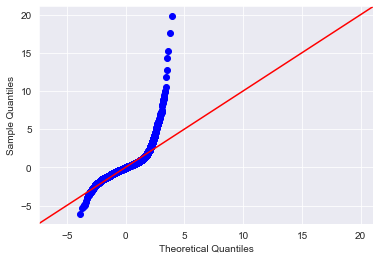

In [67]:
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

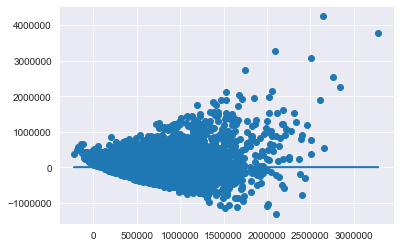

In [68]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))])

These plots look horrible. I'm going to try rerunning everything that doesn't have a high vif.

In [69]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
              'group_yr_built_3','group_yr_built_4','group_yr_built_5','group_yr_built_6',]
X = data.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,bedrooms,1.770512
1,bathrooms,3.391302
2,sqft_living,4.896267
3,sqft_lot,1.098449
4,floors,2.334314
5,waterfront,1.025944
6,grade,2.993499
7,sqft_basement,1.724735
8,zipcode_pop,15.233215
9,listings_in_zip,13.757574


Try without yr_built

In [70]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
              'active_mkt_score', 'recent_renov']
X = data.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,bedrooms,19.527830
1,bathrooms,24.881135
2,sqft_living,19.799282
3,sqft_lot,1.217424
4,floors,15.465796
5,waterfront,1.026986
6,grade,41.327450
7,sqft_basement,2.253752
8,active_mkt_score,11.658247
9,recent_renov,1.034011


But then it increases the other VIFs!

Let me see if the preprocessed model fits the q-q plot better and the scatter plot better

In [71]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement',
               'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6', ]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
prepr_model = ols(formula=formula, data=preprocessed).fit()
prepr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2356.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:46   Log-Likelihood:            -2.9572e+05
No. Observations:               21592   AIC:                         5.915e+05
Df Residuals:                   21574   BIC:                         5.916e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.574e+05   1.66e+04    -21.592      0.000    -3.9e+05   -3.25e+05
bedrooms         -3.923e+04   2152.648    -18.225      0.000   -4.35e+04    -3.5e+04
bathrooms          4.66e+04   3513.094     13.264      0.000    3.97e+04    5.35e+04
sqft_living       1.529e+05   3234.706     47.282      0.000    1.47e+05    1.59e+05
sqft_lot         -9123.9873   1532.118     -5.955      0.000   -1.21e+04   -6120.923
floors            8059.8404   4139.345      1.947      0.052     -53.582    1.62e+04
waterfront        7.397e+05   1.81e+04     40.804      0.000    7.04e+05    7.75e+05
grade             1.327e+05   2158.129     61.504      0.000    1.29e+05    1.37e+05
sqft_basement     7315.9933   1919.833      3.811      0.000    3552.979    1.11e+04
zipcode_pop      -4.443e+04   5705.558     -7.788      0.000   -5.56e+04   -3.33e+04
listings_in_zip   3.163e+04   5422.171      5.834      0.000     2.1e+04    4.23e+04
active_mkt_score -1.679e+04   4173.391     -4.023      0.000    -2.5e+04   -8607.510
recent_renov      4.877e+04   9821.553      4.966      0.000    2.95e+04     6.8e+04
group_yr_built_1  1.015e+05   5507.002     18.426      0.000    9.07e+04    1.12e+05
group_yr_built_2  7.779e+04   5182.612     15.011      0.000    6.76e+04     8.8e+04
group_yr_built_3  -523.5528   3999.192     -0.131      0.896   -8362.266    7315.160
group_yr_built_4 -1.202e+05   4284.044    -28.062      0.000   -1.29e+05   -1.12e+05
group_yr_built_5 -2.114e+05   4887.220    -43.261      0.000   -2.21e+05   -2.02e+05
group_yr_built_6 -2.045e+05   5481.713    -37.299      0.000   -2.15e+05   -1.94e+05
==============================================================================
Omnibus:                    14945.980   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           758872.084
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      31.518   Cond. No.                     5.26e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.22e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

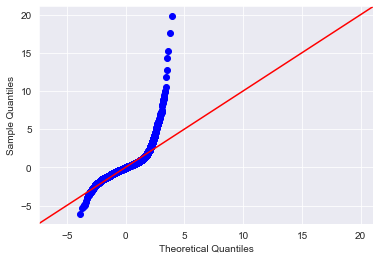

In [72]:
fig = sm.graphics.qqplot(prepr_model.resid, dist=stats.norm, line='45', fit=True)

No still just as bad

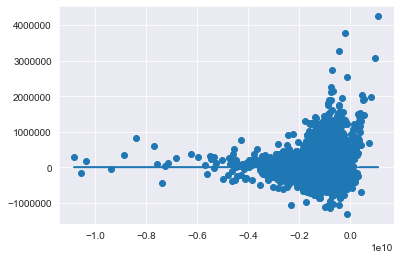

In [73]:
plt.scatter(prepr_model.predict(data[x_cols]), model.resid)
plt.plot(prepr_model.predict(data[x_cols]), [0 for i in range(len(data))])

# Standardize data

In [74]:
continuous = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade',
              'zipcode_pop', 'listings_in_zip', 'active_mkt_score', 'yr_built']
categorical= ['waterfront', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6']
non_transformed= ['bedrooms', 'bathrooms', 'floors',  'price']

In [75]:
data_cont = data[continuous]

In [76]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [77]:
data_cont_norm = data_cont.apply(normalize)

In [78]:
data_cont_norm.head(5)

,sqft_living,sqft_lot,sqft_basement,grade,zipcode_pop,listings_in_zip,active_mkt_score,yr_built
0,-0.986975,-0.234926,-0.651904,-0.560916,-0.606781,-0.817244,-0.494352,-0.544868
1,-1.316319,-0.206564,-0.651904,-1.414184,-0.606781,-0.817244,-0.494352,-0.885323
2,0.023014,-0.170899,0.445346,0.292353,-0.606781,-0.817244,-0.494352,-0.136322
3,-0.855237,-0.228701,-0.651904,-0.560916,-0.606781,-0.817244,-0.494352,-0.340595
4,-1.338275,-0.244589,-0.651904,-1.414184,-0.606781,-0.817244,-0.494352,-1.361960


In [79]:
# calling it "pdata" for "preprocessed data"
pdata = pd.concat([data_cont_norm, data[categorical], data[non_transformed]], axis=1)

In [80]:
pdata.head()

,sqft_living,sqft_lot,sqft_basement,grade,zipcode_pop,listings_in_zip,active_mkt_score,yr_built,waterfront,recent_renov,group_yr_built_1,group_yr_built_2,group_yr_built_3,group_yr_built_4,group_yr_built_5,group_yr_built_6,bedrooms,bathrooms,floors,price
0,-0.986975,-0.234926,-0.651904,-0.560916,-0.606781,-0.817244,-0.494352,-0.544868,0,0,0,0,1,0,0,0,3,1.00,1.0,221900.0
1,-1.316319,-0.206564,-0.651904,-1.414184,-0.606781,-0.817244,-0.494352,-0.885323,0,0,0,0,1,0,0,0,2,1.00,1.0,205425.0
2,0.023014,-0.170899,0.445346,0.292353,-0.606781,-0.817244,-0.494352,-0.136322,0,0,0,0,0,1,0,0,3,2.25,1.0,445000.0
3,-0.855237,-0.228701,-0.651904,-0.560916,-0.606781,-0.817244,-0.494352,-0.340595,0,0,0,0,0,1,0,0,3,1.00,1.0,236000.0
4,-1.338275,-0.244589,-0.651904,-1.414184,-0.606781,-0.817244,-0.494352,-1.361960,0,0,0,1,0,0,0,0,2,1.00,1.0,170000.0


In [81]:
# move price to the beginning 
price = pdata['price']
pdata.drop(labels=['price'], axis=1,inplace = True)
pdata.insert(0, 'price', price)
pdata.head(2)

,price,sqft_living,sqft_lot,sqft_basement,grade,zipcode_pop,listings_in_zip,active_mkt_score,yr_built,waterfront,recent_renov,group_yr_built_1,group_yr_built_2,group_yr_built_3,group_yr_built_4,group_yr_built_5,group_yr_built_6,bedrooms,bathrooms,floors
0,221900.0,-0.986975,-0.234926,-0.651904,-0.560916,-0.606781,-0.817244,-0.494352,-0.544868,0,0,0,0,1,0,0,0,3,1.0,1.0
1,205425.0,-1.316319,-0.206564,-0.651904,-1.414184,-0.606781,-0.817244,-0.494352,-0.885323,0,0,0,0,1,0,0,0,2,1.0,1.0


In [82]:
pdata.shape

(21592, 20)

# Set up train-test split

In [83]:
y = pdata[['price']]
X = pdata.drop(['price'], axis=1)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17273 4319 17273 4319


In [86]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [87]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [88]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 45832895714.7112
Test Mean Squared Error: 44492837952.92218


I wanted to check out the train-test split and see if the mean squared errors were similiar. But I won't be doing actually testing this project (per Yish, the instructor).

# Try to get a better fit

## Experiment with less expensive houses

In [89]:
data.price.describe()

count    2.159200e+04
mean     5.396811e+05
std      3.628833e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.060000e+06
Name: price, dtype: float64

The mean price of the house is \\$540,000. There are probably some very expensive outliers. I'll limit it to \\$800,000 or less.

In [90]:
cheap_homes = data[data.price <= 800000]

In [91]:
round(cheap_homes.shape[0]/data.shape[0], 3)*100

86.4

Still has 86% of the lisitings.

How about to 900k?

In [92]:
cheap_homes = pdata[pdata.price <= 900000]
round(cheap_homes.shape[0]/pdata.shape[0], 3)*100

90.60000000000001

Now 91% of listings.

## Rerun model and Q-Q plot

##### $800K and less

In [93]:
cheap_homes = pdata[pdata.price <= 800000]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cheap_homes).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1070.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:48   Log-Likelihood:            -2.4383e+05
No. Observations:               18652   AIC:                         4.877e+05
Df Residuals:                   18634   BIC:                         4.878e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.724e+05   5288.026     70.428      0.000    3.62e+05    3.83e+05
bedrooms         -7395.9864   1297.287     -5.701      0.000   -9938.788   -4853.185
bathrooms         2.558e+04   2147.620     11.909      0.000    2.14e+04    2.98e+04
sqft_living       4.901e+04   2112.948     23.195      0.000    4.49e+04    5.32e+04
sqft_lot          3859.0193    987.179      3.909      0.000    1924.058    5793.981
floors            2.399e+04   2459.735      9.753      0.000    1.92e+04    2.88e+04
waterfront        1.273e+05   1.96e+04      6.513      0.000     8.9e+04    1.66e+05
grade             9.972e+04   1580.477     63.093      0.000    9.66e+04    1.03e+05
sqft_basement     1.377e+04   1235.429     11.144      0.000    1.13e+04    1.62e+04
zipcode_pop      -1.963e+04   3279.313     -5.985      0.000   -2.61e+04   -1.32e+04
listings_in_zip   2.112e+04   3102.245      6.808      0.000     1.5e+04    2.72e+04
active_mkt_score  1.429e+04   2393.178      5.971      0.000    9598.365     1.9e+04
recent_renov     -1225.7545   6719.132     -0.182      0.855   -1.44e+04    1.19e+04
group_yr_built_1  1.662e+05   3088.811     53.822      0.000     1.6e+05    1.72e+05
group_yr_built_2  1.442e+05   2867.646     50.280      0.000    1.39e+05     1.5e+05
group_yr_built_3  8.463e+04   1986.293     42.608      0.000    8.07e+04    8.85e+04
group_yr_built_4  1.992e+04   1992.398      9.996      0.000     1.6e+04    2.38e+04
group_yr_built_5 -1.944e+04   2378.174     -8.175      0.000   -2.41e+04   -1.48e+04
group_yr_built_6 -2.311e+04   2914.052     -7.930      0.000   -2.88e+04   -1.74e+04
==============================================================================
Omnibus:                      434.641   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.243
Skew:                           0.380   Prob(JB):                    9.42e-102
Kurtosis:                       3.142   Cond. No.                     1.62e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

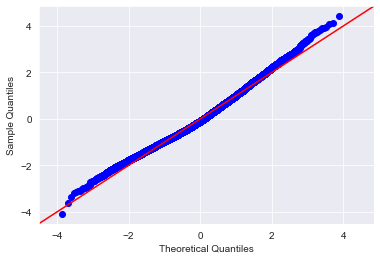

In [94]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

##### 900K and less

In [95]:
cheap_homes = pdata[pdata.price <= 900000]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cheap_homes).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1332.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:48   Log-Likelihood:            -2.5701e+05
No. Observations:               19562   AIC:                         5.141e+05
Df Residuals:                   19544   BIC:                         5.142e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.885e+05   5445.155     71.342      0.000    3.78e+05    3.99e+05
bedrooms         -7422.3981   1342.632     -5.528      0.000   -1.01e+04   -4790.724
bathrooms         2.453e+04   2215.368     11.073      0.000    2.02e+04    2.89e+04
sqft_living        5.93e+04   2155.351     27.512      0.000    5.51e+04    6.35e+04
sqft_lot          2949.6956    995.506      2.963      0.003     998.419    4900.973
floors            2.345e+04   2556.037      9.175      0.000    1.84e+04    2.85e+04
waterfront        1.414e+05   1.95e+04      7.240      0.000    1.03e+05     1.8e+05
grade             1.096e+05   1617.320     67.749      0.000    1.06e+05    1.13e+05
sqft_basement      1.18e+04   1263.480      9.341      0.000    9325.093    1.43e+04
zipcode_pop      -2.699e+04   3429.276     -7.869      0.000   -3.37e+04   -2.03e+04
listings_in_zip   2.725e+04   3255.351      8.371      0.000    2.09e+04    3.36e+04
active_mkt_score  8381.3954   2508.773      3.341      0.001    3463.985    1.33e+04
recent_renov      1.292e+04   6614.229      1.953      0.051     -48.953    2.59e+04
group_yr_built_1  1.767e+05   3198.206     55.237      0.000     1.7e+05    1.83e+05
group_yr_built_2  1.576e+05   2950.259     53.430      0.000    1.52e+05    1.63e+05
group_yr_built_3  9.032e+04   2077.256     43.478      0.000    8.62e+04    9.44e+04
group_yr_built_4  1.939e+04   2077.585      9.332      0.000    1.53e+04    2.35e+04
group_yr_built_5  -2.57e+04   2464.217    -10.429      0.000   -3.05e+04   -2.09e+04
group_yr_built_6 -2.983e+04   2995.285     -9.958      0.000   -3.57e+04    -2.4e+04
==============================================================================
Omnibus:                      626.693   Durbin-Watson:                   1.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.986
Skew:                           0.420   Prob(JB):                    2.48e-155
Kurtosis:                       3.411   Cond. No.                     4.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.09e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

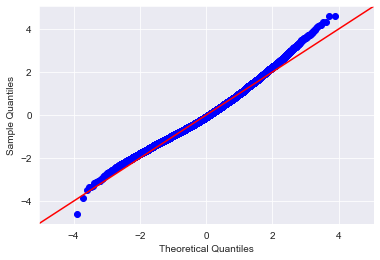

In [96]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

They look the same so I'll stick with 900k

Try for $150K

In [97]:
cheap_homes = pdata[pdata.price <= 1500000]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cheap_homes).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2011.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:49   Log-Likelihood:            -2.8160e+05
No. Observations:               21079   AIC:                         5.632e+05
Df Residuals:                   21061   BIC:                         5.634e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.262e+05   6365.158     66.957      0.000    4.14e+05    4.39e+05
bedrooms         -1.546e+04   1579.568     -9.785      0.000   -1.86e+04   -1.24e+04
bathrooms         3.115e+04   2587.477     12.040      0.000    2.61e+04    3.62e+04
sqft_living       8.516e+04   2448.768     34.778      0.000    8.04e+04       9e+04
sqft_lot         -1637.0372   1150.150     -1.423      0.155   -3891.418     617.344
floors            2.678e+04   3019.062      8.870      0.000    2.09e+04    3.27e+04
waterfront        2.705e+05   1.81e+04     14.965      0.000    2.35e+05    3.06e+05
grade             1.398e+05   1857.242     75.296      0.000    1.36e+05    1.43e+05
sqft_basement     1.356e+04   1434.542      9.450      0.000    1.07e+04    1.64e+04
zipcode_pop      -4.117e+04   4118.776     -9.996      0.000   -4.92e+04   -3.31e+04
listings_in_zip   3.613e+04   3920.503      9.217      0.000    2.84e+04    4.38e+04
active_mkt_score -7651.7927   3018.124     -2.535      0.011   -1.36e+04   -1736.038
recent_renov      3.518e+04   7348.073      4.788      0.000    2.08e+04    4.96e+04
group_yr_built_1  2.073e+05   3795.277     54.626      0.000       2e+05    2.15e+05
group_yr_built_2  1.862e+05   3488.365     53.381      0.000    1.79e+05    1.93e+05
group_yr_built_3  1.121e+05   2492.889     44.986      0.000    1.07e+05    1.17e+05
group_yr_built_4  1.923e+04   2486.622      7.735      0.000    1.44e+04    2.41e+04
group_yr_built_5 -4.725e+04   2898.195    -16.304      0.000   -5.29e+04   -4.16e+04
group_yr_built_6 -5.147e+04   3495.559    -14.725      0.000   -5.83e+04   -4.46e+04
==============================================================================
Omnibus:                     3061.681   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7591.243
Skew:                           0.826   Prob(JB):                         0.00
Kurtosis:                       5.432   Cond. No.                     2.28e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.09e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

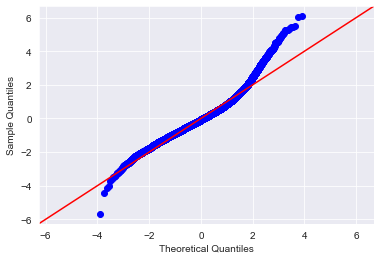

In [98]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Yes, the outliers return. I'll stick with $900k

## Limit data to cheaper homes

In [99]:
pdata = pdata[pdata.price <= 900000]

In [100]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 'listings_in_zip', 'active_mkt_score',
               'waterfront', 'recent_renov', 'yr_built', 'bedrooms', 'bathrooms', 'floors']
# 'group_yr_built_1', 'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6',

In [101]:
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1739.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:49   Log-Likelihood:            -2.5703e+05
No. Observations:               19562   AIC:                         5.141e+05
Df Residuals:                   19548   BIC:                         5.142e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.062e+05   6215.013     65.361      0.000    3.94e+05    4.18e+05
sqft_living       5.928e+04   2155.191     27.508      0.000    5.51e+04    6.35e+04
sqft_lot          1235.1264    989.353      1.248      0.212    -704.090    3174.343
sqft_basement     1.202e+04   1254.230      9.584      0.000    9562.682    1.45e+04
grade             1.099e+05   1617.473     67.948      0.000    1.07e+05    1.13e+05
zipcode_pop      -2.899e+04   3417.509     -8.483      0.000   -3.57e+04   -2.23e+04
listings_in_zip   2.823e+04   3248.677      8.690      0.000    2.19e+04    3.46e+04
active_mkt_score  9204.6010   2500.544      3.681      0.000    4303.321    1.41e+04
waterfront        1.413e+05   1.95e+04      7.227      0.000    1.03e+05     1.8e+05
recent_renov      7707.3233   6618.886      1.164      0.244   -5266.258    2.07e+04
yr_built         -7.427e+04   1232.837    -60.241      0.000   -7.67e+04   -7.19e+04
bedrooms         -9783.2472   1319.159     -7.416      0.000   -1.24e+04   -7197.584
bathrooms         2.609e+04   2183.554     11.947      0.000    2.18e+04    3.04e+04
floors            3.791e+04   2271.307     16.693      0.000    3.35e+04    4.24e+04
==============================================================================
Omnibus:                      692.610   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              805.465
Skew:                           0.436   Prob(JB):                    1.25e-175
Kurtosis:                       3.476   Cond. No.                         97.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Change to categorical for year

I don't like how the `yr_built` has a negative coefficient in the model above. I also standardized it. I'll switch to the yr_group categories

In [102]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 'listings_in_zip', 'active_mkt_score',
               'waterfront', 'recent_renov',  'bedrooms', 'bathrooms', 'floors', 'group_yr_built_1', 
               'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6']

In [103]:
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pdata).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1332.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:49   Log-Likelihood:            -2.5701e+05
No. Observations:               19562   AIC:                         5.141e+05
Df Residuals:                   19544   BIC:                         5.142e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.885e+05   5445.155     71.342      0.000    3.78e+05    3.99e+05
sqft_living        5.93e+04   2155.351     27.512      0.000    5.51e+04    6.35e+04
sqft_lot          2949.6956    995.506      2.963      0.003     998.419    4900.973
sqft_basement      1.18e+04   1263.480      9.341      0.000    9325.093    1.43e+04
grade             1.096e+05   1617.320     67.749      0.000    1.06e+05    1.13e+05
zipcode_pop      -2.699e+04   3429.276     -7.869      0.000   -3.37e+04   -2.03e+04
listings_in_zip   2.725e+04   3255.351      8.371      0.000    2.09e+04    3.36e+04
active_mkt_score  8381.3954   2508.773      3.341      0.001    3463.985    1.33e+04
waterfront        1.414e+05   1.95e+04      7.240      0.000    1.03e+05     1.8e+05
recent_renov      1.292e+04   6614.229      1.953      0.051     -48.953    2.59e+04
bedrooms         -7422.3981   1342.632     -5.528      0.000   -1.01e+04   -4790.724
bathrooms         2.453e+04   2215.368     11.073      0.000    2.02e+04    2.89e+04
floors            2.345e+04   2556.037      9.175      0.000    1.84e+04    2.85e+04
group_yr_built_1  1.767e+05   3198.206     55.237      0.000     1.7e+05    1.83e+05
group_yr_built_2  1.576e+05   2950.259     53.430      0.000    1.52e+05    1.63e+05
group_yr_built_3  9.032e+04   2077.256     43.478      0.000    8.62e+04    9.44e+04
group_yr_built_4  1.939e+04   2077.585      9.332      0.000    1.53e+04    2.35e+04
group_yr_built_5  -2.57e+04   2464.217    -10.429      0.000   -3.05e+04   -2.09e+04
group_yr_built_6 -2.983e+04   2995.285     -9.958      0.000   -3.57e+04    -2.4e+04
==============================================================================
Omnibus:                      626.693   Durbin-Watson:                   1.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.986
Skew:                           0.420   Prob(JB):                    2.48e-155
Kurtosis:                       3.411   Cond. No.                     3.84e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.56e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Yes, the `group_yr_built` categories make more sense, but some of the other ones are still off. Bedrooms decrease price? Check the VIFs.

In [104]:
X = pdata.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,sqft_living,3.831203
1,sqft_lot,1.092007
2,sqft_basement,1.686564
3,grade,2.345396
4,zipcode_pop,15.295594
5,listings_in_zip,13.723782
6,active_mkt_score,8.244877
7,waterfront,1.007206
8,recent_renov,1.044095
9,bedrooms,1.799771


### Eliminate group_yr_built_6

In [105]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 
               'listings_in_zip', 'active_mkt_score', 'waterfront', 'recent_renov',  'floors', 'group_yr_built_1', 
               'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5']

X = pdata.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,bedrooms,22.357344
1,bathrooms,22.299990
2,sqft_living,3.027584
3,sqft_lot,1.086853
4,sqft_basement,1.695605
5,grade,2.439319
6,zipcode_pop,15.217926
7,listings_in_zip,13.632327
8,active_mkt_score,8.124446
9,waterfront,1.008914


Yes, that helped the group_yr VIFs

### Eliminate bedrooms

In [106]:
chosen_cols = ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 'listings_in_zip', 'active_mkt_score',
               'waterfront', 'recent_renov',  'floors', 'group_yr_built_1', 
               'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5']

X = pdata.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,bathrooms,16.485888
1,sqft_living,2.804172
2,sqft_lot,1.082965
3,sqft_basement,1.694385
4,grade,2.368939
5,zipcode_pop,15.213106
6,listings_in_zip,13.630225
7,active_mkt_score,8.124438
8,waterfront,1.007881
9,recent_renov,1.049090


### Eliminate bathrooms

In [107]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 'listings_in_zip', 'active_mkt_score',
               'waterfront', 'recent_renov',  'floors', 'group_yr_built_1', 
               'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5']

X = pdata.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,sqft_living,2.618848
1,sqft_lot,1.082645
2,sqft_basement,1.555364
3,grade,2.368905
4,zipcode_pop,15.211182
5,listings_in_zip,13.626410
6,active_mkt_score,8.118995
7,waterfront,1.007645
8,recent_renov,1.046742
9,floors,2.965233


`zipcode_pop`, `listings_in_zip`, and `active_mkt_score` are all based on each other. I'll get rid of `zipcode_pop`, `listings_in_zip`.

In [108]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'active_mkt_score',
               'waterfront', 'recent_renov',  'floors', 'group_yr_built_1', 
               'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5']

X = pdata.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,sqft_living,2.602185
1,sqft_lot,1.062762
2,sqft_basement,1.547500
3,grade,2.361729
4,active_mkt_score,1.055104
5,waterfront,1.004843
6,recent_renov,1.046655
7,floors,2.963659
8,group_yr_built_1,1.314674
9,group_yr_built_2,1.354531


**Looks good!** I'll redo the model and Q-Q plot.

# Final model

In [109]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'active_mkt_score', 'waterfront', 'recent_renov',  
               'floors', 'group_yr_built_1', 'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 
               'group_yr_built_5']

outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1709.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:52   Log-Likelihood:            -2.5712e+05
No. Observations:               19562   AIC:                         5.143e+05
Df Residuals:                   19548   BIC:                         5.144e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.818e+05   5307.604     71.936      0.000    3.71e+05    3.92e+05
sqft_living       6.136e+04   1766.917     34.728      0.000    5.79e+04    6.48e+04
sqft_lot          2502.7500    987.307      2.535      0.011     567.545    4437.955
sqft_basement     1.563e+04   1237.267     12.634      0.000    1.32e+04    1.81e+04
grade             1.122e+05   1601.095     70.094      0.000    1.09e+05    1.15e+05
active_mkt_score  2.756e+04    906.689     30.397      0.000    2.58e+04    2.93e+04
waterfront        1.432e+05   1.96e+04      7.305      0.000    1.05e+05    1.82e+05
recent_renov      2.105e+04   6605.685      3.187      0.001    8103.618     3.4e+04
floors                3e+04   2504.144     11.978      0.000    2.51e+04    3.49e+04
group_yr_built_1  1.941e+05   4444.790     43.668      0.000    1.85e+05    2.03e+05
group_yr_built_2  1.755e+05   4254.948     41.238      0.000    1.67e+05    1.84e+05
group_yr_built_3  1.083e+05   3679.383     29.421      0.000    1.01e+05    1.15e+05
group_yr_built_4  3.967e+04   3478.000     11.407      0.000    3.29e+04    4.65e+04
group_yr_built_5  1838.3349   2910.288      0.632      0.528   -3866.077    7542.747
==============================================================================
Omnibus:                      612.728   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.243
Skew:                           0.417   Prob(JB):                    7.92e-151
Kurtosis:                       3.389   Cond. No.                         41.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Only the group_yr_built_5 has a high p-score. But all the variables make sense!

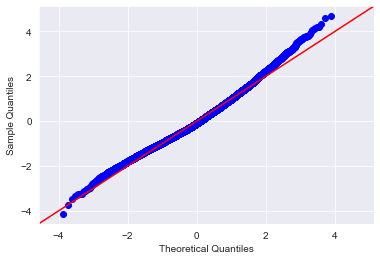

In [110]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

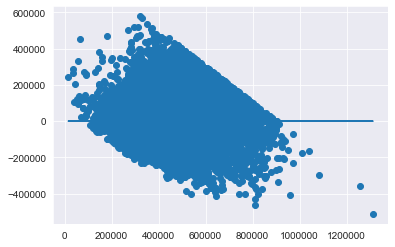

In [111]:
plt.scatter(model.predict(pdata[x_cols]), model.resid)
plt.plot(model.predict(pdata[x_cols]), [0 for i in range(len(pdata))])

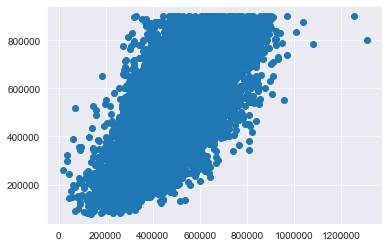

In [112]:
plt.scatter(model.predict(pdata[x_cols]), pdata.price)
# plot a diaganol line 0, 900000  and 0 900000

Not sure how to interpret this.

In [113]:
pdata.price.describe()

count     19562.000000
mean     453730.230651
std      180655.707780
min       78000.000000
25%      310000.000000
50%      425000.000000
75%      575000.000000
max      900000.000000
Name: price, dtype: float64

## Removing the one with the high p-value. `group_yr_built_5`

In [114]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'active_mkt_score', 'waterfront', 'recent_renov',  
               'floors', 'group_yr_built_1', 'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4']

outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1851.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:02:54   Log-Likelihood:            -2.5712e+05
No. Observations:               19562   AIC:                         5.143e+05
Df Residuals:                   19549   BIC:                         5.144e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.836e+05   4484.021     85.549      0.000    3.75e+05    3.92e+05
sqft_living       6.138e+04   1766.538     34.748      0.000    5.79e+04    6.48e+04
sqft_lot          2565.5214    982.278      2.612      0.009     640.173    4490.869
sqft_basement     1.561e+04   1236.589     12.620      0.000    1.32e+04     1.8e+04
grade             1.122e+05   1600.957     70.107      0.000    1.09e+05    1.15e+05
active_mkt_score   2.75e+04    901.495     30.505      0.000    2.57e+04    2.93e+04
waterfront        1.432e+05   1.96e+04      7.308      0.000    1.05e+05    1.82e+05
recent_renov      2.118e+04   6602.517      3.208      0.001    8236.963    3.41e+04
floors            2.952e+04   2388.723     12.358      0.000    2.48e+04    3.42e+04
group_yr_built_1   1.93e+05   4069.411     47.419      0.000    1.85e+05    2.01e+05
group_yr_built_2  1.743e+05   3844.906     45.337      0.000    1.67e+05    1.82e+05
group_yr_built_3   1.07e+05   3092.672     34.595      0.000    1.01e+05    1.13e+05
group_yr_built_4  3.842e+04   2850.617     13.476      0.000    3.28e+04     4.4e+04
==============================================================================
Omnibus:                      612.052   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              690.357
Skew:                           0.417   Prob(JB):                    1.23e-150
Kurtosis:                       3.388   Cond. No.                         41.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

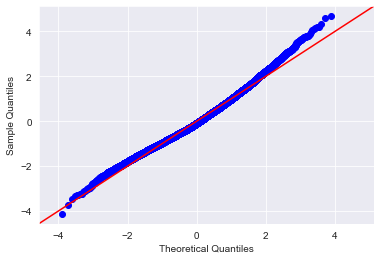

In [115]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Text(0, 0.5, 'Prices')

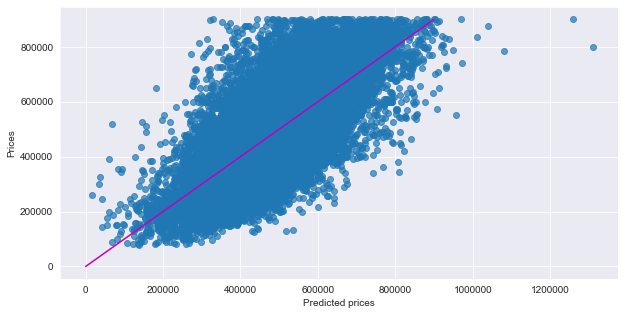

In [116]:
plt.figure(figsize=(10,5))
plt.scatter(model.predict(pdata[x_cols]), pdata.price, alpha=0.7)
plt.plot([0, 900000], [0, 900000], color="m")
plt.xlabel("Predicted prices")
plt.ylabel("Prices")

# Conclusion

## Readjusting normalized data

In [117]:
# sqft_living standard deviation
data.sqft_living.std()

910.9015530676392

In [120]:
# z-score sqft_living standard deviation
pdata.sqft_living.std()

0.7986626382946118

In [118]:
# sqft_lot standard deviation 
data.sqft_lot.std()

39842.374736767066

In [121]:
# z-score sqft_lot standard deviation 
pdata.sqft_lot.std()

0.9231716028326195

In [119]:
# sqft_basement standard deviation
data.sqft_basement.std()

437.4573227863983

In [122]:
# z-score sqft_basement standard deviation
pdata.sqft_basement.std()

0.9039549068562927

## Conclusions

- R-squared - 0.532, which means a little more than half of the observed variation in price can be explained by the model's inputs
- All p-values in the model are lower than a 0.05 threshold. With the null hypothesis being that any particular characteristic of a house has no effect on the house's price, we can reject that hypothesis when discussing these features. In other words, there is a less than 5% chance that the included features do not have an effect on a home's price. 

### Coefficient Interpretation 

#### Area data

If all other variables stay constant:

- For each 910.9 increase/decrease in living square footage, we expect a home's price to average increase/decrease \\$61,380.
- For each 39,842 increase/decrease in lot square footage, we expect a home's price to average increase/decrease \\$2,565.
- For each 437.5 increase/decrease in basement square footage, we expect a home's price to average increase/decrease \\$722.

#### Other data

- For every grade a house increases, its value is expected to rise \\$112,000 
- Houses in an active market command higher prices than similar houses in less active markets
- If a house is located on a waterfront, it is expected to be worth \\$143,200 more
- Houses renovated within the last 25 years are expected to be worth \\$21,180 more.
- Each additional floor added to a house is expected to increase its worth \\$29,520.
-  The model does not incorporate the age of houses built since 1980. Houses in older age groups tend to be worth more, perhaps because of urban locations.  

1. 1900-1919 - \\$193,000  
2. 1920-1939 - \\$174,300  
3. 1940-1959 - \\$107,000
4. 1960-1979 - \\$38,420

## Next steps

- For area-related categories such as living square footage, basement square footage, and lot square footage, the data is likely influenced as to whether a home is in an urban, suburban, or rural area. An apartment in Seattle is different than a rural farmhouse. I would develop more useful models for different zip codes.

- See if older houses being worth more is correlated to zip codes. I suspect that this finding is related to urban areas with older housing stock.
- Dive into the engineered feature of “active market score” and investigate more how these scores affect prices.